# Quickest Electric Cars EDA

## Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor

import graphviz

In [2]:
# Check for the working directory
!pwd

/Users/escortkwon/Code/Portfolio_Project_2021/Quickest Electric Cars


In [3]:
# Check for what files does certain directory have
!ls

QuickestElectricCars.ipynb          archive.zip
Quickestelectriccars-EVDatabase.csv tree.dot


In [4]:
# Unzip for fetch data
!unzip -o archive.zip

Archive:  archive.zip
  inflating: Quickestelectriccars-EVDatabase.csv  


In [5]:
cars = pd.read_csv('Quickestelectriccars-EVDatabase.csv')
cars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1 sec,410 km/h,970 km,206 Wh/km,920 km/h,All Wheel Drive,4,"€215,000","£189,000"
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6 sec,262 km/h,455 km,198 Wh/km,680 km/h,All Wheel Drive,7,"€116,990","£110,980"
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9 sec,250 km/h,380 km,220 Wh/km,790 km/h,All Wheel Drive,4,"€187,746","£139,910"
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0 sec,210 km/h,750 km,267 Wh/km,710 km/h,All Wheel Drive,7,"€75,000","£68,000"
...,...,...,...,...,...,...,...,...,...,...,...
174,Peugeot e-Traveller Standard 75 kWh,Battery Electric Vehicle | 68 kWh,13.3 sec,130 km/h,270 km,252 Wh/km,290 km/h,Front Wheel Drive,7,"€57,440",NaN
175,Peugeot e-Traveller Long 75 kWh,Battery Electric Vehicle | 68 kWh,13.3 sec,130 km/h,270 km,252 Wh/km,290 km/h,Front Wheel Drive,7,"€58,230",NaN
176,Nissan e-NV200 Evalia,Battery Electric Vehicle | 36 kWh,14.0 sec,123 km/h,165 km,218 Wh/km,170 km/h,Front Wheel Drive,7,"€43,433","£30,255"
177,Dacia Spring Electric,Battery Electric Vehicle | 26.8 kWh,15.0 sec,125 km/h,170 km,158 Wh/km,120 km/h,Front Wheel Drive,4,"€20,490",NaN


## Data Preprocessing

In [6]:
# Check null values by columns
cars.isnull().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

In [7]:
# Remove rows which has nulll values
cars.dropna(axis=0, inplace=True)
cars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1 sec,410 km/h,970 km,206 Wh/km,920 km/h,All Wheel Drive,4,"€215,000","£189,000"
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6 sec,262 km/h,455 km,198 Wh/km,680 km/h,All Wheel Drive,7,"€116,990","£110,980"
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9 sec,250 km/h,380 km,220 Wh/km,790 km/h,All Wheel Drive,4,"€187,746","£139,910"
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0 sec,210 km/h,750 km,267 Wh/km,710 km/h,All Wheel Drive,7,"€75,000","£68,000"
...,...,...,...,...,...,...,...,...,...,...,...
160,Mercedes EQV 300 Long,Battery Electric Vehicle | 90 kWh,12.1 sec,160 km/h,320 km,281 Wh/km,280 km/h,Front Wheel Drive,7,"€71,388","£70,665"
165,Smart EQ forfour,Battery Electric Vehicle | 16.7 kWh,12.7 sec,130 km/h,95 km,176 Wh/km,-,Rear Wheel Drive,4,"€19,120","£19,795"
166,Peugeot e-Traveller Standard 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€55,900","£49,065"
167,Peugeot e-Traveller Long 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€56,690","£49,905"


In [8]:
# Remove rows which is '-'
idx = cars[cars['FastChargeSpeed'] == '-'].index
cars = cars.drop(idx)
cars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1 sec,410 km/h,970 km,206 Wh/km,920 km/h,All Wheel Drive,4,"€215,000","£189,000"
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6 sec,262 km/h,455 km,198 Wh/km,680 km/h,All Wheel Drive,7,"€116,990","£110,980"
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9 sec,250 km/h,380 km,220 Wh/km,790 km/h,All Wheel Drive,4,"€187,746","£139,910"
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0 sec,210 km/h,750 km,267 Wh/km,710 km/h,All Wheel Drive,7,"€75,000","£68,000"
...,...,...,...,...,...,...,...,...,...,...,...
158,Opel Zafira-e Life L 50 kWh,Battery Electric Vehicle | 45 kWh,12.1 sec,130 km/h,180 km,250 Wh/km,240 km/h,Front Wheel Drive,7,"€54,625","£49,465"
160,Mercedes EQV 300 Long,Battery Electric Vehicle | 90 kWh,12.1 sec,160 km/h,320 km,281 Wh/km,280 km/h,Front Wheel Drive,7,"€71,388","£70,665"
166,Peugeot e-Traveller Standard 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€55,900","£49,065"
167,Peugeot e-Traveller Long 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€56,690","£49,905"


In [9]:
# Reset index
cars.reset_index(drop=True, inplace=True)
cars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1 sec,410 km/h,970 km,206 Wh/km,920 km/h,All Wheel Drive,4,"€215,000","£189,000"
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6 sec,262 km/h,455 km,198 Wh/km,680 km/h,All Wheel Drive,7,"€116,990","£110,980"
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9 sec,250 km/h,380 km,220 Wh/km,790 km/h,All Wheel Drive,4,"€187,746","£139,910"
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0 sec,210 km/h,750 km,267 Wh/km,710 km/h,All Wheel Drive,7,"€75,000","£68,000"
...,...,...,...,...,...,...,...,...,...,...,...
118,Opel Zafira-e Life L 50 kWh,Battery Electric Vehicle | 45 kWh,12.1 sec,130 km/h,180 km,250 Wh/km,240 km/h,Front Wheel Drive,7,"€54,625","£49,465"
119,Mercedes EQV 300 Long,Battery Electric Vehicle | 90 kWh,12.1 sec,160 km/h,320 km,281 Wh/km,280 km/h,Front Wheel Drive,7,"€71,388","£70,665"
120,Peugeot e-Traveller Standard 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€55,900","£49,065"
121,Peugeot e-Traveller Long 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€56,690","£49,905"


In [10]:
# Create 'Compnay' Column
cars['Company'] = cars['Name'].str.split(' ').str[0]
cars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Company
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1 sec,410 km/h,970 km,206 Wh/km,920 km/h,All Wheel Drive,4,"€215,000","£189,000",Tesla
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6 sec,262 km/h,455 km,198 Wh/km,680 km/h,All Wheel Drive,7,"€116,990","£110,980",Tesla
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830",Porsche
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9 sec,250 km/h,380 km,220 Wh/km,790 km/h,All Wheel Drive,4,"€187,746","£139,910",Porsche
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0 sec,210 km/h,750 km,267 Wh/km,710 km/h,All Wheel Drive,7,"€75,000","£68,000",Tesla
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Opel Zafira-e Life L 50 kWh,Battery Electric Vehicle | 45 kWh,12.1 sec,130 km/h,180 km,250 Wh/km,240 km/h,Front Wheel Drive,7,"€54,625","£49,465",Opel
119,Mercedes EQV 300 Long,Battery Electric Vehicle | 90 kWh,12.1 sec,160 km/h,320 km,281 Wh/km,280 km/h,Front Wheel Drive,7,"€71,388","£70,665",Mercedes
120,Peugeot e-Traveller Standard 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€55,900","£49,065",Peugeot
121,Peugeot e-Traveller Long 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€56,690","£49,905",Peugeot


In [11]:
# Remove units of each column
cars['BatteryCapacity[kWh]'] = cars['Subtitle'].str.extract(r'(\d+[.\d]*)').astype(float)
cars['Acceleration[sec]'] = cars['Acceleration'].str.extract(r'(\d+[.\d]*)').astype(float)
cars['TopSpeed[km/h]'] = cars['TopSpeed'].str.extract(r'(\d+)').astype(int)
cars['Range[km]'] = cars['Range'].str.extract(r'(\d+)').astype(int)
cars['Efficiency[Wh/km]'] = cars['Efficiency'].str.extract(r'(\d+)').astype(int)
cars['FastChargeSpeed[km/h]'] = cars['FastChargeSpeed'].str.extract(r'(\d+)').astype(int)
cars['Drive_Class'] = cars['Drive'].str.split(' ').str[0]
cars['PriceinGermany[€]'] = cars['PriceinGermany'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype(int)
cars['PriceinUK[£]'] = cars['PriceinUK'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype(int)

cars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,...,Company,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h],Drive_Class,PriceinGermany[€],PriceinUK[£]
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1 sec,410 km/h,970 km,206 Wh/km,920 km/h,All Wheel Drive,4,"€215,000",...,Tesla,200.0,2.1,410,970,206,920,All,215000,189000
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6 sec,262 km/h,455 km,198 Wh/km,680 km/h,All Wheel Drive,7,"€116,990",...,Tesla,90.0,2.6,262,455,198,680,All,116990,110980
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336",...,Porsche,83.7,2.8,260,390,215,860,All,186336,138830
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9 sec,250 km/h,380 km,220 Wh/km,790 km/h,All Wheel Drive,4,"€187,746",...,Porsche,83.7,2.9,250,380,220,790,All,187746,139910
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0 sec,210 km/h,750 km,267 Wh/km,710 km/h,All Wheel Drive,7,"€75,000",...,Tesla,200.0,3.0,210,750,267,710,All,75000,68000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Opel Zafira-e Life L 50 kWh,Battery Electric Vehicle | 45 kWh,12.1 sec,130 km/h,180 km,250 Wh/km,240 km/h,Front Wheel Drive,7,"€54,625",...,Opel,45.0,12.1,130,180,250,240,Front,54625,49465
119,Mercedes EQV 300 Long,Battery Electric Vehicle | 90 kWh,12.1 sec,160 km/h,320 km,281 Wh/km,280 km/h,Front Wheel Drive,7,"€71,388",...,Mercedes,90.0,12.1,160,320,281,280,Front,71388,70665
120,Peugeot e-Traveller Standard 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€55,900",...,Peugeot,45.0,13.1,130,185,243,250,Front,55900,49065
121,Peugeot e-Traveller Long 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€56,690",...,Peugeot,45.0,13.1,130,185,243,250,Front,56690,49905


In [12]:
# Remove old ones
cars.drop(['Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK'], axis=1, inplace=True)
cars

,Name,Company,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h],Drive_Class,PriceinGermany[€],PriceinUK[£]
0,Tesla Roadster,Tesla,200.0,2.1,410,970,206,920,All,215000,189000
1,Tesla Model X Plaid,Tesla,90.0,2.6,262,455,198,680,All,116990,110980
2,Porsche Taycan Turbo S,Porsche,83.7,2.8,260,390,215,860,All,186336,138830
3,Porsche Taycan Turbo S Cross Turismo,Porsche,83.7,2.9,250,380,220,790,All,187746,139910
4,Tesla Cybertruck Tri Motor,Tesla,200.0,3.0,210,750,267,710,All,75000,68000
...,...,...,...,...,...,...,...,...,...,...,...
118,Opel Zafira-e Life L 50 kWh,Opel,45.0,12.1,130,180,250,240,Front,54625,49465
119,Mercedes EQV 300 Long,Mercedes,90.0,12.1,160,320,281,280,Front,71388,70665
120,Peugeot e-Traveller Standard 50 kWh,Peugeot,45.0,13.1,130,185,243,250,Front,55900,49065
121,Peugeot e-Traveller Long 50 kWh,Peugeot,45.0,13.1,130,185,243,250,Front,56690,49905


## Visualization

### Heatmap

#### Heatmap across the DataFrame

In [13]:
# Create groupby processed DataFrame
# We can visualize between all features and companies
cars_groupby = cars.groupby('Company').mean()
cars_groupby

,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h],PriceinGermany[€],PriceinUK[£]
Company,,,,,,,,
Audi,73.200000,6.263636,194.090909,347.272727,211.727273,538.181818,73709.090909,66225.454545
BMW,69.628571,5.900000,186.428571,375.714286,182.571429,490.000000,64485.714286,57154.285714
Byton,87.333333,6.833333,190.000000,371.666667,234.666667,453.333333,59833.333333,55833.333333
CUPRA,59.500000,7.450000,160.000000,355.000000,167.250000,465.000000,37867.500000,33125.000000
Citroen,45.000000,10.900000,140.000000,217.500000,211.500000,290.000000,43040.000000,31445.000000
DS,45.000000,8.700000,150.000000,250.000000,180.000000,330.000000,30040.000000,31500.000000
Fiat,32.800000,9.166667,145.000000,220.000000,148.333333,363.333333,27226.666667,23711.666667
Ford,78.000000,6.500000,180.000000,383.750000,203.250000,395.000000,54568.750000,48747.500000
Honda,28.500000,8.650000,145.000000,170.000000,168.000000,190.000000,35925.000000,28910.000000


In [14]:
# Normalization
# Unit of each columns is differenct each other.
# Therfore, with Normalization, we can compare columns with same level
def mean_norm(df_input):
    return df_input.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

cars_norm = mean_norm(cars_groupby)
cars_norm

,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h],PriceinGermany[€],PriceinUK[£]
Company,,,,,,,,
Audi,0.555270,-0.572743,0.697926,0.232144,0.998414,0.347452,0.854081,0.971189
BMW,0.380778,-0.757725,0.450287,0.517607,-0.337510,0.152742,0.464801,0.524842
Byton,1.245790,-0.282938,0.565712,0.476982,2.049500,0.004566,0.268444,0.459844
CUPRA,-0.114079,0.030761,-0.403860,0.309701,-1.039540,0.051713,-0.658641,-0.657520
Citroen,-0.822513,1.785778,-1.050241,-1.070360,0.988000,-0.655489,-0.440331,-0.740185
DS,-0.822513,0.666637,-0.727050,-0.744164,-0.455333,-0.493842,-0.989006,-0.737478
Fiat,-1.418575,0.904030,-0.888645,-1.045268,-1.906304,-0.359137,-1.107745,-1.120703
Ford,0.789786,-0.452505,0.242522,0.598260,0.609984,-0.231167,0.046248,0.111185
Honda,-1.628662,0.641202,-0.888645,-1.547109,-1.005175,-1.059604,-0.740625,-0.864919


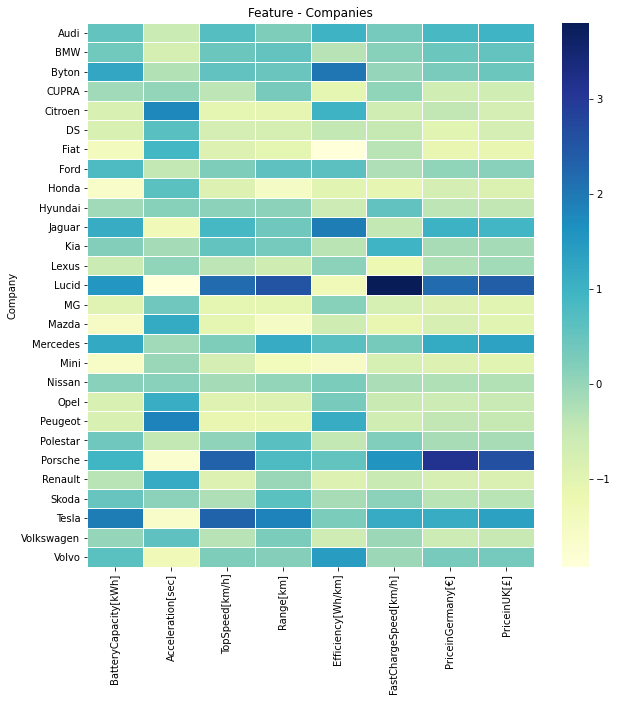

In [15]:
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data=cars_norm, linewidths=.5, cmap="YlGnBu")
plt.title('Feature - Companies')
plt.show()

#### Heatmap Drive_Class - Companies

In [16]:
# Function which creates Pivot Table
# We can choose Feature which we want to select
def cars_pivot(data, index, columns, values):
    global cars_pt
    cars_pt = pd.pivot_table(data=data, index=index, columns=columns, values=values, aggfunc='mean', fill_value=0)

cars_pivot(cars, 'Company', 'Drive_Class', 'BatteryCapacity[kWh]')

In [17]:
cars_pt

Drive_Class,All,Front,Rear
Company,,,
Audi,78.200000,0.000000,59.866667
BMW,85.633333,0.000000,57.625000
Byton,95.000000,0.000000,83.500000
CUPRA,0.000000,0.000000,59.500000
Citroen,0.000000,45.000000,0.000000
DS,0.000000,45.000000,0.000000
Fiat,0.000000,32.800000,0.000000
Ford,78.000000,0.000000,78.000000
Honda,0.000000,0.000000,28.500000


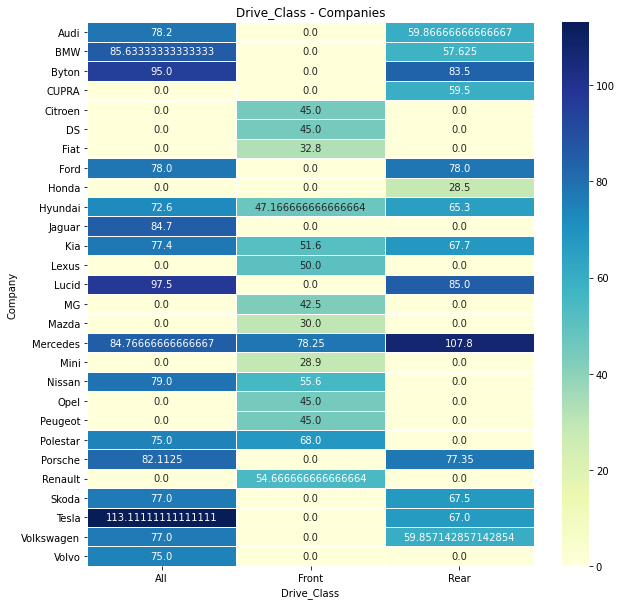

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=cars_pt, annot=True, annot_kws={"size":10}, linewidths=.5, cmap="YlGnBu", fmt="")
plt.title('Drive_Class - Companies')
plt.show()

### Bar Plot

#### Battery Capacity

In [19]:
cars_BatteryCapacity = cars.sort_values(by='BatteryCapacity[kWh]', ascending=False)
cars_BatteryCapacity

,Name,Company,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h],Drive_Class,PriceinGermany[€],PriceinUK[£]
0,Tesla Roadster,Tesla,200.0,2.1,410,970,206,920,All,215000,189000
4,Tesla Cybertruck Tri Motor,Tesla,200.0,3.0,210,750,267,710,All,75000,68000
29,Tesla Cybertruck Dual Motor,Tesla,120.0,5.0,190,460,261,710,All,55000,48000
5,Lucid Air Grand Touring,Lucid,110.0,3.2,270,660,167,1380,All,140000,125000
21,Mercedes EQS 580 4MATIC,Mercedes,107.8,4.3,210,610,177,800,All,135529,115000
...,...,...,...,...,...,...,...,...,...,...,...
110,Mazda MX-30,Mazda,30.0,9.7,140,170,176,180,Front,34490,26045
67,Mini Cooper SE,Mini,28.9,7.3,150,185,156,260,Front,32500,26000
86,Honda e Advance,Honda,28.5,8.3,145,170,168,190,Rear,38000,30160
102,Honda e,Honda,28.5,9.0,145,170,168,190,Rear,33850,27660


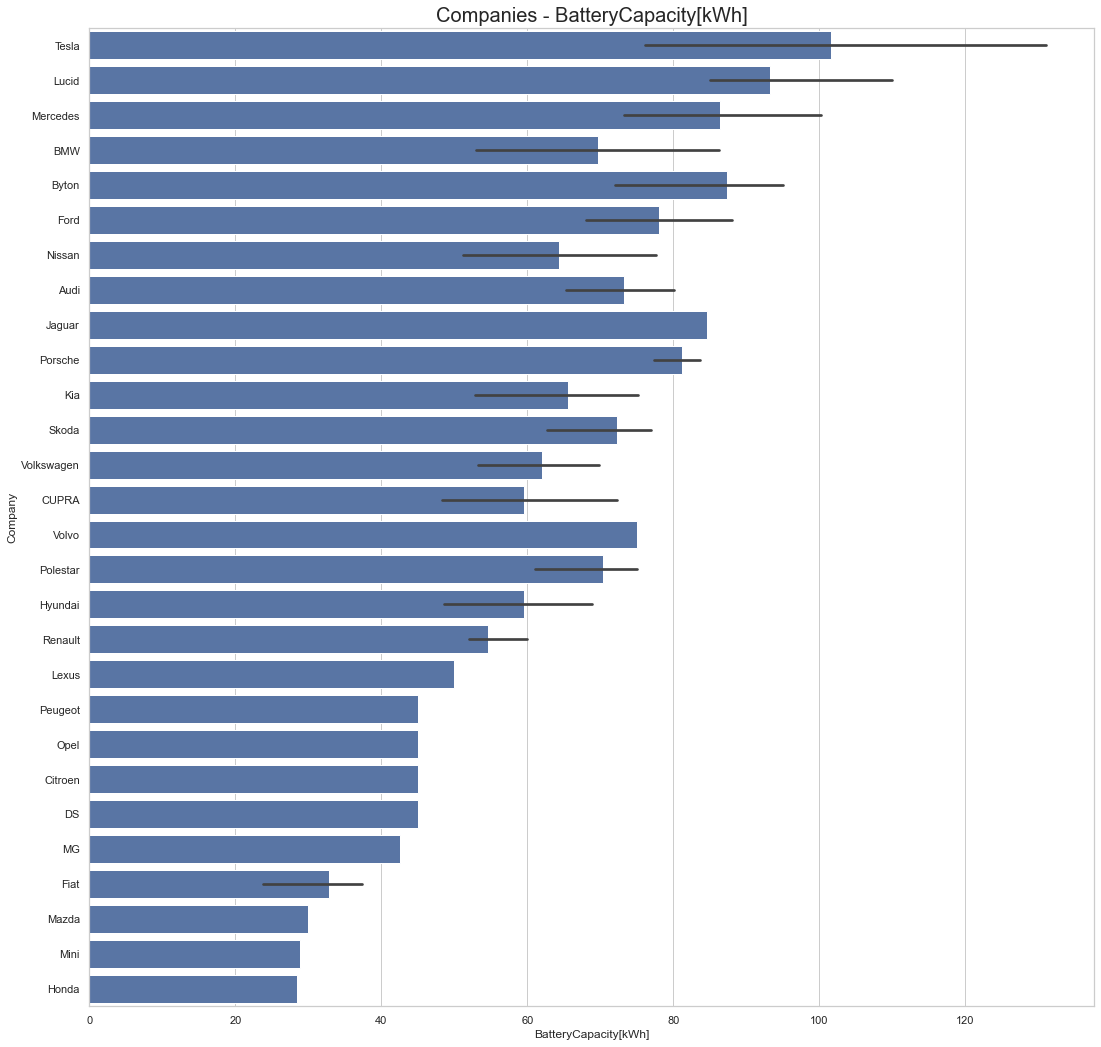

In [20]:
# Single Plot

sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(18, 18))
sns.barplot(x='BatteryCapacity[kWh]', y='Company', data=cars_BatteryCapacity, color='b')
plt.title('Companies - BatteryCapacity[kWh]', fontdict={'size': 20})

plt.show()

#### Range

In [21]:
cars_Range = cars.sort_values(by='Range[km]', ascending=False)
cars_Range

,Name,Company,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h],Drive_Class,PriceinGermany[€],PriceinUK[£]
0,Tesla Roadster,Tesla,200.0,2.1,410,970,206,920,All,215000,189000
4,Tesla Cybertruck Tri Motor,Tesla,200.0,3.0,210,750,267,710,All,75000,68000
5,Lucid Air Grand Touring,Lucid,110.0,3.2,270,660,167,1380,All,140000,125000
48,Mercedes EQS 450+,Mercedes,107.8,6.2,210,640,168,840,Rear,106374,95000
21,Mercedes EQS 580 4MATIC,Mercedes,107.8,4.3,210,610,177,800,All,135529,115000
...,...,...,...,...,...,...,...,...,...,...,...
102,Honda e,Honda,28.5,9.0,145,170,168,190,Rear,33850,27660
110,Mazda MX-30,Mazda,30.0,9.7,140,170,176,180,Front,34490,26045
86,Honda e Advance,Honda,28.5,8.3,145,170,168,190,Rear,38000,30160
105,Fiat 500e Hatchback 24 kWh,Fiat,23.8,9.5,135,165,144,260,Front,23560,20495


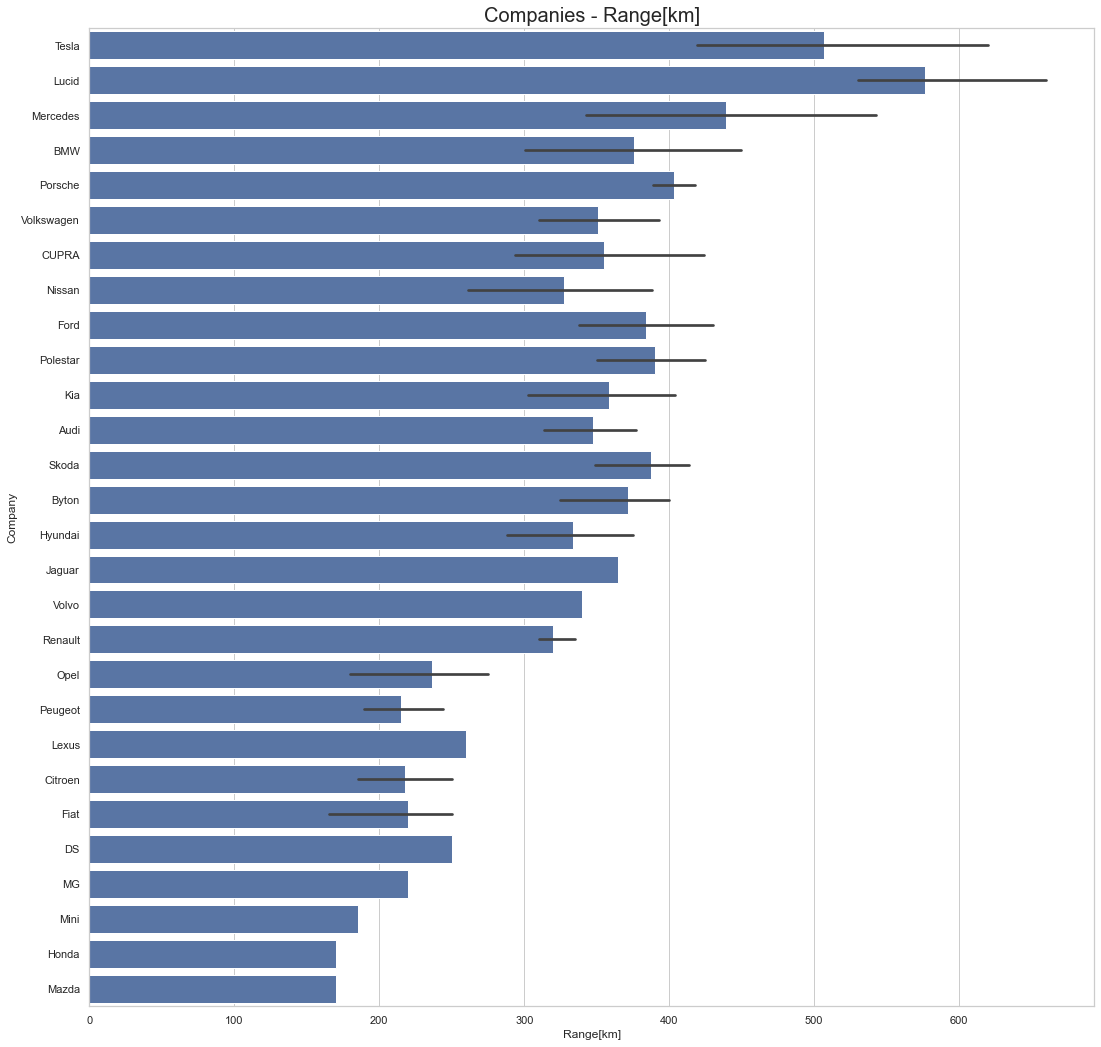

In [22]:
# Single Plot

sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(18, 18))
sns.barplot(x='Range[km]', y='Company', data=cars_Range, color='b')
plt.title('Companies - Range[km]', fontdict={'size': 20})

plt.show()

#### Battery Capacity & Range

In [23]:
# All features are important
# But most of all, Battery Capacity and Range is more considered when we choose electric cars
# Multiplots
cars_norm_sorted = cars_norm.sort_values(by=['BatteryCapacity[kWh]', 'Range[km]'], ascending=False)
cars_norm_sorted.reset_index(inplace=True)
cars_norm_sorted

,Company,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h],PriceinGermany[€],PriceinUK[£]
0,Tesla,1.942009,-1.635234,2.292088,1.836133,0.247242,1.139457,1.128668,1.345166
1,Lucid,1.538935,-1.927736,2.181665,2.534528,-1.310642,3.803251,2.174737,2.387041
2,Byton,1.245790,-0.282938,0.565712,0.476982,2.049500,0.004566,0.268444,0.459844
3,Mercedes,1.201818,-0.104893,0.242522,1.154466,0.651986,0.314388,1.168137,1.319948
4,Jaguar,1.117131,-1.317296,0.888903,0.410069,1.927313,-0.453431,1.005638,0.920485
5,Porsche,0.944176,-1.714082,2.310941,0.791468,0.543545,1.567146,3.142422,2.612951
6,Ford,0.789786,-0.452505,0.242522,0.598260,0.609984,-0.231167,0.046248,0.111185
7,Volvo,0.643213,-1.317296,0.242522,0.159149,1.423292,-0.049316,0.302912,0.353643
8,Audi,0.555270,-0.572743,0.697926,0.232144,0.998414,0.347452,0.854081,0.971189
9,Skoda,0.508855,0.107066,-0.242264,0.635898,-0.180413,0.102228,-0.359718,-0.339594


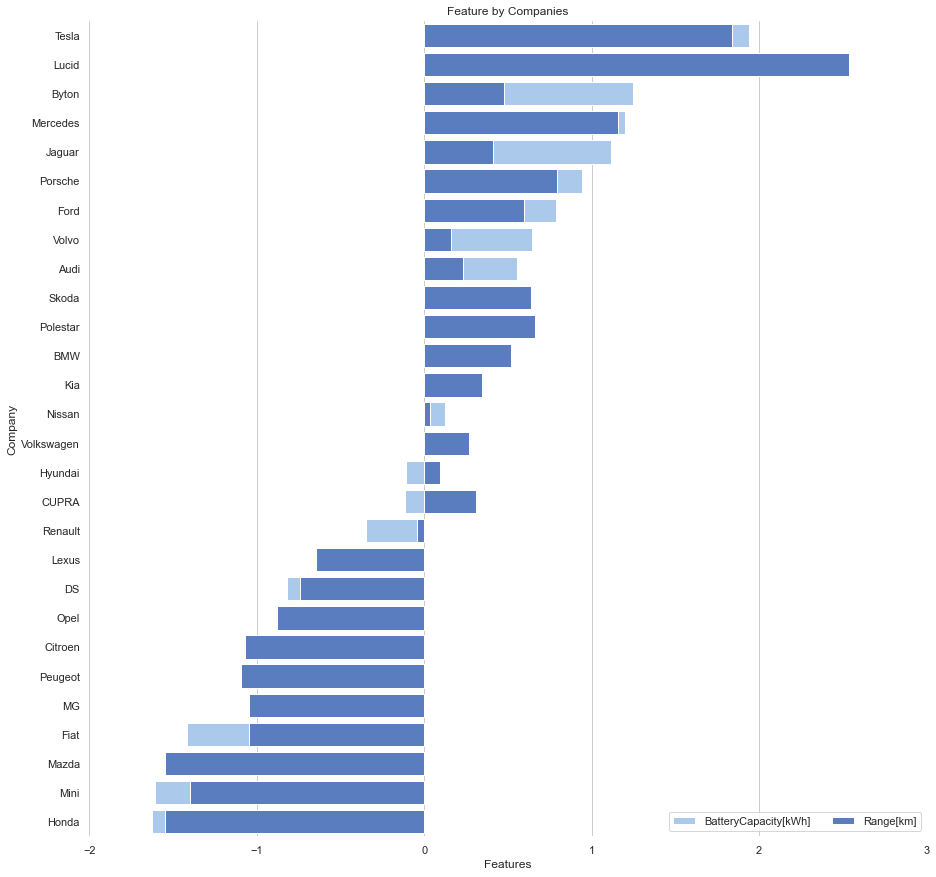

In [24]:
# Batplots with multi index: BatteryCapacity[kWh], Range[km]

sns.set_theme(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Plot the BatteryCapacity[kWh]
sns.set_color_codes("pastel")
sns.barplot(x='BatteryCapacity[kWh]', y='Company', data=cars_norm_sorted, label='BatteryCapacity[kWh]', color='b')

# Plot the Range[km]
sns.set_color_codes("muted")
sns.barplot(x='Range[km]', y='Company', data=cars_norm_sorted, label='Range[km]', color='b')

# Add a legend and informative axis label
ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(-2, 3), xlabel='Features', ylabel='Company', title='Feature by Companies')
sns.despine(left=True, bottom=True)

plt.show()

#### Price

/Users/escortkwon/miniforge3/envs/Drill_DL_TF/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/escortkwon/miniforge3/envs/Drill_DL_TF/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


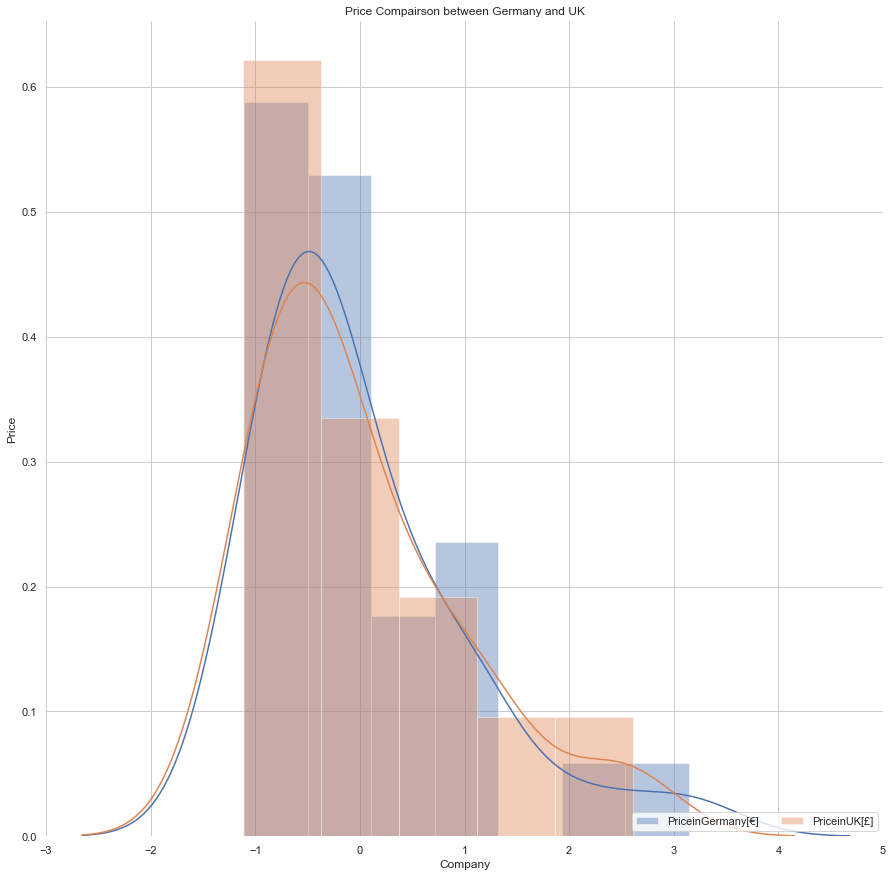

In [25]:
# Price Compairson between Germany and UK

f, ax = plt.subplots(figsize=(15, 15))
sns.distplot(cars_norm_sorted['PriceinGermany[€]'], hist=True, label='PriceinGermany[€]')
sns.distplot(cars_norm_sorted['PriceinUK[£]'], hist=True, label='PriceinUK[£]')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(-3, 5), xlabel='Company', ylabel='Price', title='Price Compairson between Germany and UK')
sns.despine(left=True, bottom=True)

### Summary
1. Generally, the performance of German manufacturers is very poweful.
2. Most of manufacturers has chosen for All Wheel Drive
3. Prices between Germany and U.K. is similar by Normalized Data

## Preidiction

### Classification

#### Dataset

In [26]:
# Reload for the data
cars

,Name,Company,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h],Drive_Class,PriceinGermany[€],PriceinUK[£]
0,Tesla Roadster,Tesla,200.0,2.1,410,970,206,920,All,215000,189000
1,Tesla Model X Plaid,Tesla,90.0,2.6,262,455,198,680,All,116990,110980
2,Porsche Taycan Turbo S,Porsche,83.7,2.8,260,390,215,860,All,186336,138830
3,Porsche Taycan Turbo S Cross Turismo,Porsche,83.7,2.9,250,380,220,790,All,187746,139910
4,Tesla Cybertruck Tri Motor,Tesla,200.0,3.0,210,750,267,710,All,75000,68000
...,...,...,...,...,...,...,...,...,...,...,...
118,Opel Zafira-e Life L 50 kWh,Opel,45.0,12.1,130,180,250,240,Front,54625,49465
119,Mercedes EQV 300 Long,Mercedes,90.0,12.1,160,320,281,280,Front,71388,70665
120,Peugeot e-Traveller Standard 50 kWh,Peugeot,45.0,13.1,130,185,243,250,Front,55900,49065
121,Peugeot e-Traveller Long 50 kWh,Peugeot,45.0,13.1,130,185,243,250,Front,56690,49905


In [27]:
# For training precisely, we should process Normalization of data
# Use following function: 'mean_norm'
# Extract feature columns and process Normalization
cars_before_norm = cars[['BatteryCapacity[kWh]', 'Acceleration[sec]', 'TopSpeed[km/h]', 'Range[km]', 'Efficiency[Wh/km]', 'FastChargeSpeed[km/h]']]
cars_after_norm = mean_norm(cars_before_norm)
cars_after_norm

,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h]
0,4.984570,-1.913626,5.349104,5.136812,0.483216,1.526380
1,0.795413,-1.715532,1.834519,0.807208,0.207092,0.587069
2,0.555489,-1.636294,1.787025,0.260754,0.793854,1.291552
3,0.555489,-1.596675,1.549553,0.176684,0.966431,1.017586
4,4.984570,-1.557056,0.599665,3.287273,2.588655,0.704483
...,...,...,...,...,...,...
118,-0.918332,2.048266,-1.300111,-1.504716,2.001893,-1.135000
119,0.795413,2.048266,-0.587695,-0.327736,3.071871,-0.978448
120,-0.918332,2.444456,-1.300111,-1.462681,1.760286,-1.095862
121,-0.918332,2.444456,-1.300111,-1.462681,1.760286,-1.095862


In [28]:
# Concatenate and check the basic data for training
cars_data = pd.concat([cars[['Name', 'Company']], cars_after_norm], axis=1)
cars_data

,Name,Company,BatteryCapacity[kWh],Acceleration[sec],TopSpeed[km/h],Range[km],Efficiency[Wh/km],FastChargeSpeed[km/h]
0,Tesla Roadster,Tesla,4.984570,-1.913626,5.349104,5.136812,0.483216,1.526380
1,Tesla Model X Plaid,Tesla,0.795413,-1.715532,1.834519,0.807208,0.207092,0.587069
2,Porsche Taycan Turbo S,Porsche,0.555489,-1.636294,1.787025,0.260754,0.793854,1.291552
3,Porsche Taycan Turbo S Cross Turismo,Porsche,0.555489,-1.596675,1.549553,0.176684,0.966431,1.017586
4,Tesla Cybertruck Tri Motor,Tesla,4.984570,-1.557056,0.599665,3.287273,2.588655,0.704483
...,...,...,...,...,...,...,...,...
118,Opel Zafira-e Life L 50 kWh,Opel,-0.918332,2.048266,-1.300111,-1.504716,2.001893,-1.135000
119,Mercedes EQV 300 Long,Mercedes,0.795413,2.048266,-0.587695,-0.327736,3.071871,-0.978448
120,Peugeot e-Traveller Standard 50 kWh,Peugeot,-0.918332,2.444456,-1.300111,-1.462681,1.760286,-1.095862
121,Peugeot e-Traveller Long 50 kWh,Peugeot,-0.918332,2.444456,-1.300111,-1.462681,1.760286,-1.095862


In [29]:
# ValueError: Unknown label type: 'continuous'
# We should convert 'label' from float to int in order to avoid above error
cars_data = cars_data.astype({'Range[km]': 'int'})

In [30]:
# Define 'Feature' & 'Label' for Supervised Learning
X = cars_data[['BatteryCapacity[kWh]', 'Acceleration[sec]', 'TopSpeed[km/h]', 'Efficiency[Wh/km]', 'FastChargeSpeed[km/h]']]
y = cars_data['Range[km]']
X, y

(     BatteryCapacity[kWh]  Acceleration[sec]  TopSpeed[km/h]  \
 0                4.984570          -1.913626        5.349104   
 1                0.795413          -1.715532        1.834519   
 2                0.555489          -1.636294        1.787025   
 3                0.555489          -1.596675        1.549553   
 4                4.984570          -1.557056        0.599665   
 ..                    ...                ...             ...   
 118             -0.918332           2.048266       -1.300111   
 119              0.795413           2.048266       -0.587695   
 120             -0.918332           2.444456       -1.300111   
 121             -0.918332           2.444456       -1.300111   
 122             -1.261082           2.801026       -1.466341   
 
      Efficiency[Wh/km]  FastChargeSpeed[km/h]  
 0             0.483216               1.526380  
 1             0.207092               0.587069  
 2             0.793854               1.291552  
 3             0.96643

In [31]:
# Check shape of features and labels
X.shape, y.shape

((123, 5), (123,))

In [32]:
# Create datasets for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Check shape of train dataset and test datatset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86, 5), (37, 5), (86,), (37,))

#### Predict

In [34]:
# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [35]:
# fit and accuracy score
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test, pred))

accuracy score:  0.918918918918919


#### Cross Value Score

In [36]:
# cross_val_score
score = cross_val_score(dt_clf, X, y, scoring="accuracy", cv=3)
print('accuracy per cv:', np.round(score, 4))
print('average of accuracies:', np.round(np.mean(score), 4))

accuracy per cv: [0.3659 0.9512 0.6585]
average of accuracies: 0.6585


/Users/escortkwon/miniforge3/envs/Drill_DL_TF/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


### Regression

In [37]:
# RandomForestRegression
rf = RandomForestRegressor(random_state=42, n_estimators=1000)

In [38]:
neg_mse_scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [39]:
print('Individual Negative MSE scores per 5 cross value scores: ', np.round(neg_mse_scores, 2))
print('Individual RMSE scores per 5 cross value scores: ', np.round(rmse_scores, 2))
print('Average RMSE scores per 5 cross value scores: {0:.3f}'.format(avg_rmse))

Individual Negative MSE scores per 5 cross value scores:  [-1.08 -0.16 -0.08 -0.03 -0.35]
Individual RMSE scores per 5 cross value scores:  [1.04 0.4  0.29 0.18 0.59]
Average RMSE scores per 5 cross value scores: 0.501
